# Introduction to Pytorch

## 0. Preparing

In [1]:
# These are the libraries will be used for this lab.

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


## 1. Tensors

Tensors are a specialized data structure that are very similar to arrays and matrices. In PyTorch, we use tensors to encode the inputs and outputs of a model, as well as the model’s parameters.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data (see Bridge with NumPy). Tensors are also optimized for automatic differentiation (we’ll see more about that later in the Autograd section). If you’re familiar with ndarrays, you’ll be right at home with the Tensor API. If not, follow along!





### summary of dtype / tensor
[pytorch official site : TORCH.TENSOR](https://pytorch.org/docs/stable/tensors.html)  
  
| datatype | dtype | CPU tensor | GPU tensor|  
| :-: | :-: | :-: | :-: |  
|32bit float | `torch.float32` or `torch.float` | `torch.FloatTensor` | `torch.cuda.FloatTensor`|  
|64bit float | `torch.float64` or `torch.double` | `torch.DoubleTensor` | `torch.cuda.DoubleTensor`|  
|16bit float | `torch.float16` or `torch.half`  | `torch.HalfTensor` | `torch.cuda.HalfTensor`|  
|32bit int | `torch.int32` or `torch.int` | `torch.IntTensor` | `torch.cuda.IntTensor`|  
|64bit int | `torch.int64` or `torch.long` | `torch.LongTensor` | `torch.cuda.LongTensor`|  
|16bit int | `torch.int16` or `torch.short` | `torch.ShortTensor` | `torch.cuda.Short`|

## 1.1. Initializing a Tensor

* Directly from data
* From a Numpy array
* With random or constant values

### 1.1.1. Directly from data

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

### 1.1.2 From a NumPy array

In [3]:
np_array = np.array(data)
x_np = torch.tensor(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

### 1.1.3 With random or constant values

In [4]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(zeros_tensor)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


## 1.2. Attributes of a Tensor

Tensor attributes describe their shape, datatype, and the device on which they are stored.



In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


--------------




## 1.3. Operations on Tensors


Over 100 tensor operations, including arithmetic, linear algebra, matrix manipulation (transposing,
indexing, slicing), sampling and more are
comprehensively described `here <https://pytorch.org/docs/stable/torch.html>`__.




Try out some of the operations from the list.
If you're familiar with the NumPy API, you'll find the Tensor API a breeze to use.




### 1.3.1 Standard numpy-like indexing and slicing:



In [ ]:
tensor = torch.rand([4, 4])
tensor

tensor([[0.8798, 0.3402, 0.3438, 0.7218],
        [0.1645, 0.1769, 0.2817, 0.3093],
        [0.7621, 0.6251, 0.6597, 0.9433],
        [0.4541, 0.2620, 0.4600, 0.2815]])

In [ ]:
print('First row: ', tensor[0])
print('First column: ', tensor[:, 0])
print('Last column:', tensor[:, -1])
tensor[:,1] = 0
print(tensor)

First row:  tensor([0.8798, 0.3402, 0.3438, 0.7218])
First column:  tensor([0.8798, 0.1645, 0.7621, 0.4541])
Last column: tensor([0.7218, 0.3093, 0.9433, 0.2815])
tensor([[0.8798, 0.0000, 0.3438, 0.7218],
        [0.1645, 0.0000, 0.2817, 0.3093],
        [0.7621, 0.0000, 0.6597, 0.9433],
        [0.4541, 0.0000, 0.4600, 0.2815]])


## 1.3.2 Arithmetic operations




In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2 will have the same value
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

print(y1)
print(y2)



tensor([[1.4132, 0.4648, 1.5781, 0.7608],
        [0.4648, 0.2021, 0.6030, 0.2914],
        [1.5781, 0.6030, 1.9058, 0.9151],
        [0.7608, 0.2914, 0.9151, 0.4971]])
tensor([[0.8114, 0.1091, 0.6419, 0.6242],
        [0.1438, 0.2098, 0.5018, 0.4153],
        [0.9825, 0.3892, 0.4958, 0.2456],
        [0.3931, 0.6129, 0.9296, 0.5375]])


In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
print(z1)

tensor([[0.7741, 0.0000, 0.1182, 0.5210],
        [0.0271, 0.0000, 0.0794, 0.0956],
        [0.5808, 0.0000, 0.4352, 0.8898],
        [0.2062, 0.0000, 0.2116, 0.0792]])


**Single-element tensors** If you have a one-element tensor, for example by aggregating all
values of a tensor into one value, you can convert it to a Python
numerical value using ``item()``:



In [ ]:
agg = tensor.sum()
agg_item = agg.item()
print(agg_item, type(agg_item))

6.2615861892700195 <class 'float'>


--------------




# 2. Derivatives

## 2.1. Derivatives

Determine the derivative of

$ y = 2x^3+x $   

at   $x=1$.


In [ ]:
x = torch.tensor(1., requires_grad=True) #every operation on them should be tracked

y = 2 * x ** 3 + x

y.backward() # calculate derivatives and stores them in the respective tensors' .grad

x.grad

tensor(7.)

$ \frac{dy(x)}{dx} = 6x^{2} + 1$  

$ \frac{dy(x=1)}{dx} = 6*1^{2} + 1$

In [ ]:
print('data:',x.data)
print('grad:',x.grad)



data: tensor(1.)
grad_fn: None
grad: tensor(7.)


In [ ]:
print('data:',y.data)
print('grad:',y.grad)


data: tensor(3.)
grad_fn: <AddBackward0 object at 0x7ff520953dd0>
grad: None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  This is separate from the ipykernel package so we can avoid doing imports until


### 2.2. Partial Derivates

Try to determine partial derivative  $u$ of the following function where $u=2$ and $v=1$: $ f=uv+(uv)^2$


In [ ]:
# Practice: Calculate the derivative of f = u * v + (u * v) ** 2 at u = 2, v = 1

# Type the code here
u = torch.tensor(2., requires_grad=True)
v = torch.tensor(1., requires_grad=True)
y = u*v + (u*v)**2

y.backward()
print(u.grad, v.grad)

tensor(5.) tensor(10.)


### Exercise 1:  

Repeat the above using vector gradients.

### Exercise 2:
You are given

$y=\exp(2x_1)+x_2^2$.

Calculate $\triangledown y = \left( \frac{\delta y}{\delta x_1},
\frac{\delta y}{\delta x_2} \right)$ at $x_1=1.0$ and $x_2=2.0$.

# 3. Gradient descent

## 3.1 Gradient descent in 1-dim

### Example 1:
You are given

$f(x)=(x-2)^2+3$.

You want to minimize ```f``` by finding proper value of ```x=x^*```.

You know

$\frac{d f}{d x}=2(x-2)$.

You want to start $x_0 = 6$ with learning rate ```lr=0.1```.

In [ ]:
def df(x):
  return 2*(x-2)

lr=0.1
x0 = 6.0

df0 = df(x0)
x1 = x0 - lr*df0

df1 = df(x1)
x2 = x1 - lr*df1



In [ ]:
print(df0, x0)
print(df1, x1)
print(x2)

8.0 6.0
6.4 5.2
4.5600000000000005


In [ ]:
x=6
lr=0.1
print(x, df(x))
for i in range(10):
  x=x-lr*df(x)
  print(x, df(x))

6 8
5.2 6.4
4.5600000000000005 5.120000000000001
4.048 4.096
3.6384 3.2767999999999997
3.31072 2.6214399999999998
3.0485759999999997 2.0971519999999995
2.8388608 1.6777216
2.67108864 1.3421772799999996
2.536870912 1.0737418239999998
2.4294967296 0.8589934591999997


In [ ]:
df(1.34)

-1.3199999999999998

## 1.2 Gradient descent in 2 dim

### Example 2:
You are given

$f(\boldsymbol{\beta})=(\beta_1-2)^2+3(\beta_2-3)^2+3$.

You want to minimize ```f``` by finding proper value of ```\boldsymbol{\beta}```.

You know

$\triangledown f=(2(\beta_1-2), 6(\beta_2-3))$.

In [ ]:
beta=np.array([10.0,20.0])
lr=0.1
print(beta, df(beta))
def df(beta):
  return np.array([2*(beta[0]-2), 6*(beta[1]-3)])
for i in range(20):
  beta = beta - lr*df(beta)
  print(beta, df(beta))

[10. 20.] [16. 36.]
[8.4 9.8] [12.8 40.8]
[7.12 5.72] [10.24 16.32]
[6.096 4.088] [8.192 6.528]
[5.2768 3.4352] [6.5536 2.6112]
[4.62144 3.17408] [5.24288 1.04448]
[4.097152 3.069632] [4.194304 0.417792]
[3.6777216 3.0278528] [3.3554432 0.1671168]
[3.34217728 3.01114112] [2.68435456 0.06684672]
[3.07374182 3.00445645] [2.14748365 0.02673869]
[2.85899346 3.00178258] [1.71798692 0.01069548]
[2.68719477 3.00071303] [1.37438953 0.00427819]
[2.54975581 3.00028521] [1.09951163 0.00171128]
[2.43980465 3.00011409] [8.79609302e-01 6.84510413e-04]
[2.35184372 3.00004563] [7.03687442e-01 2.73804165e-04]
[2.28147498 3.00001825] [5.62949953e-01 1.09521666e-04]
[2.22517998 3.0000073 ] [4.50359963e-01 4.38086664e-05]
[2.18014399 3.00000292] [3.60287970e-01 1.75234666e-05]
[2.14411519 3.00000117] [2.88230376e-01 7.00938663e-06]
[2.11529215 3.00000047] [2.30584301e-01 2.80375465e-06]
[2.09223372 3.00000019] [1.84467441e-01 1.12150186e-06]


We can solve Example 2 using pytorch and auto differentiation.

In [ ]:
beta = torch.tensor([10.0, 20.0], requires_grad=True)
def f(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3

loss = f(beta)
loss.backward()
beta.grad

beta.data = beta.data - lr*beta.grad
print(beta)
beta.grad.data.zero_() # this is important!!!

tensor([8.4000, 9.8000], requires_grad=True)


tensor([0., 0.])

In [ ]:
loss=f(beta)
loss.backward()
beta.grad

beta.data = beta.data - lr*beta.grad
print(beta)
beta.grad.data.zero_()

tensor([7.1200, 5.7200], requires_grad=True)


tensor([0., 0.])

In [ ]:
lr=0.1
beta = torch.tensor([10.0, 20.0], requires_grad=True)
def f(beta):
  return (beta[0]-2)**2+3*(beta[1]-3)**2+3
print(beta.data)
history = []
for i in range(5):
  loss = f(beta)
  history.append(loss.item())
  loss.backward()
  beta.data = beta.data - lr*beta.grad
  beta.grad.zero_()
  print(beta.data)

tensor([10., 20.])
tensor([8.4000, 9.8000])
tensor([7.1200, 5.7200])
tensor([6.0960, 4.0880])
tensor([5.2768, 3.4352])
tensor([4.6214, 3.1741])


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history

[934.0,
 182.67999267578125,
 51.40959548950195,
 23.328445434570312,
 14.30561351776123]

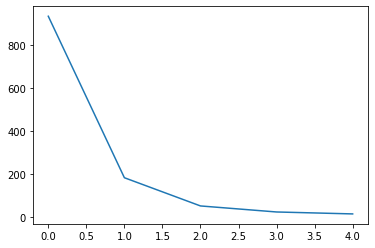

In [ ]:
plt.plot(history)